In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import bt
import talib

In [2]:
%matplotlib inline

### Signal Strategy - Function

In [3]:
def signal_strategy(ticker, period, name, start_date='2020-2-1', end_date='2020-11-1'):
    price_data = bt.get(ticker, start=start_date, end=end_date)
    sma = price_data.rolling(period).mean()
    # Bt Strategy
    bt_strategy = bt.Strategy(name,
                             [
                                 bt.algos.SelectWhere(price_data > sma),
                                 bt.algos.WeighEqually(),
                                 bt.algos.Rebalance()
                             ])
    # Backtest
    bt_backtest = bt.Backtest(bt_strategy, price_data)
    # Backtest
    return bt_backtest
    

In [4]:
# Create signal strategy backtest
ticker = 'tsla'
sma10 = signal_strategy(ticker, period=10, name='SMA10')
sma30 = signal_strategy(ticker, period=30, name='SMA30')
sma50 = signal_strategy(ticker, period=50, name='SMA50')

<AxesSubplot:title={'center':'Strategy optimization'}>

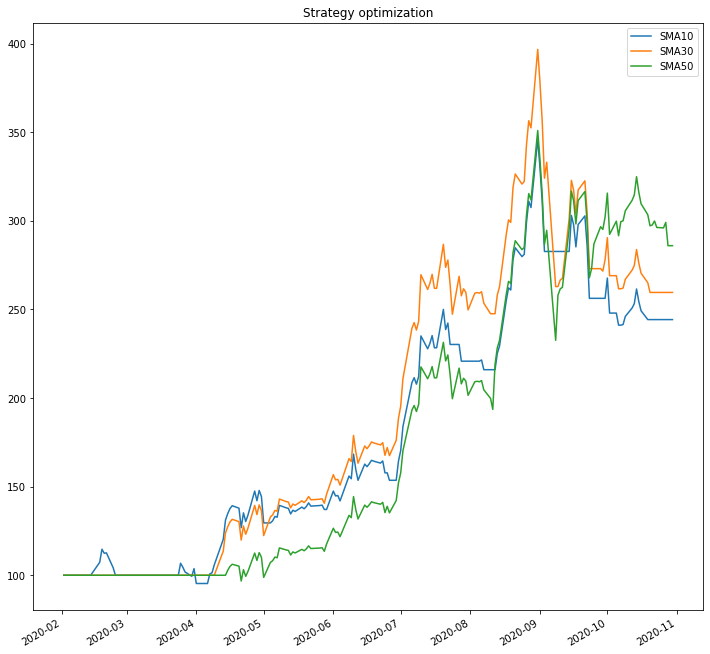

In [13]:
# Run all backtests and plot the resutls
bt_results = bt.run(sma10, sma30, sma50)
bt_results.plot(figsize=(12,12), title='Strategy optimization')

### Buy & Hold

In [10]:
def buy_and_hold(ticker, name, start_date='2020-2-1', end_date='2020-11-1'):
    price_data = bt.get(ticker, start=start_date, end=end_date)
    # Bt Strategy
    bt_strategy = bt.Strategy(name,
                             [
                                 bt.algos.RunOnce(),
                                 bt.algos.SelectAll(),
                                 bt.algos.WeighEqually(),
                                 bt.algos.Rebalance()
                             ])
    # Backtest
    bt_backtest = bt.Backtest(bt_strategy, price_data)
    # Backtest
    return bt_backtest
    

<AxesSubplot:title={'center':'Strategy benchmarking'}>

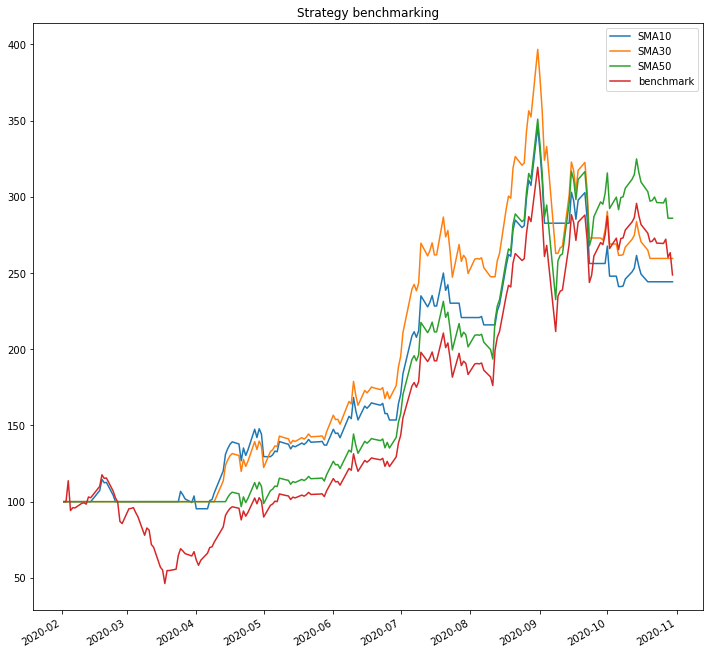

In [12]:
# Create benchmark strategy backtest
benchmark = buy_and_hold('tsla', name='benchmark')

# Run all backtests and plot the resutls
bt_results = bt.run(sma10, sma30, sma50, benchmark)
bt_results.plot(figsize=(12,12), title='Strategy benchmarking')